In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2025-03-20 18:06:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   320KB/s    in 0.2s    

2025-03-20 18:06:26 (320 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df = pd.read_csv('FuelConsumption.csv')
df=df[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df.rename(columns={'FUELCONSUMPTION_COMB_MPG':'comubstion', 'CO2EMISSIONS':'emission'},inplace=True)
df.head()

,comubstion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


In [8]:
df.shape

(1067, 2)

### Plot the data

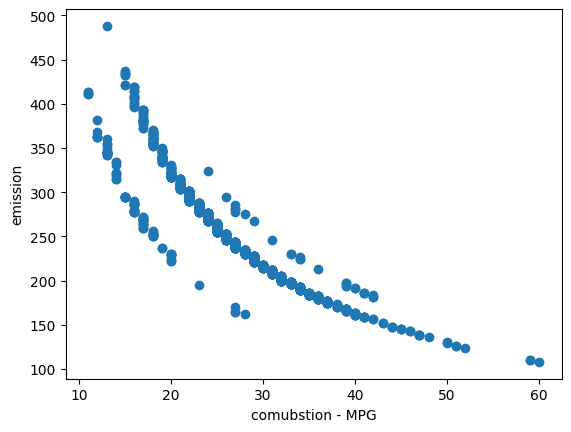

In [11]:
plt.xlabel('comubstion - MPG')
plt.ylabel('emission')
plt.scatter(df['comubstion'],df['emission'])

In [31]:
X = df.iloc[:,0:1].values
y = df['emission']

### Split the data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### First Try Linear regression

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [37]:
# calculate metrics

from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score=", r2_score(y_test, y_pred))
print("MSE=", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score= 0.8431421420508673
MSE= 26.1562904974779


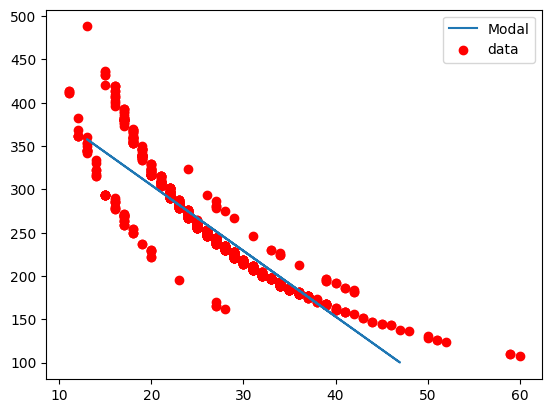

In [41]:
# plot the linear regression line

plt.plot(X_test, model.predict(X_test), label="Modal")
plt.scatter(X_train, y_train, label="data", color="r")
plt.legend()
plt.show()

### Now try Ploynomial regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [45]:
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly.shape)
X_train_poly

(853, 3)


array([[  1.,  27., 729.],
       [  1.,  13., 169.],
       [  1.,  20., 400.],
       ...,
       [  1.,  25., 625.],
       [  1.,  28., 784.],
       [  1.,  26., 676.]])

In [50]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
X_test_poly = poly.fit_transform(X_test)
y_pred = model_poly.predict(X_test_poly)

In [52]:
# calculate metrics

from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score=", r2_score(y_test, y_pred))
print("MSE=", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score= 0.871253537289721
MSE= 23.696852480131056


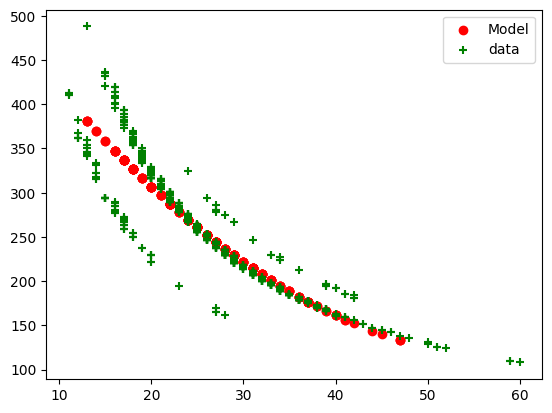

In [54]:
# plot the polynomial linear regression line

plt.scatter(X_test, y_pred, label="Model", color="red")
plt.scatter(X_train, y_train, label="data", marker="+", color="green")
plt.legend()
plt.show()